In [262]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Breast_cancer_data.csv")
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [263]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB
None


In [264]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


<Axes: xlabel='diagnosis', ylabel='count'>

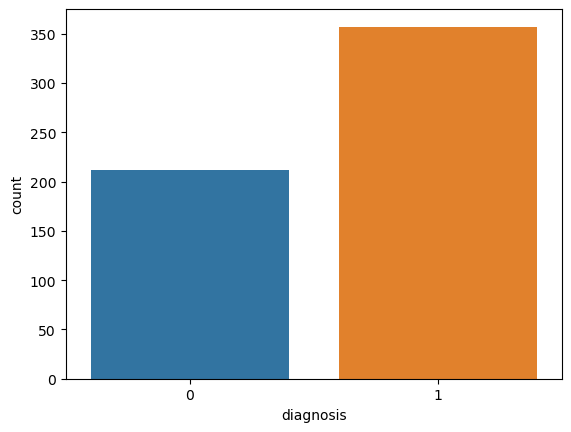

In [265]:
sns.countplot(x=df["diagnosis"])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


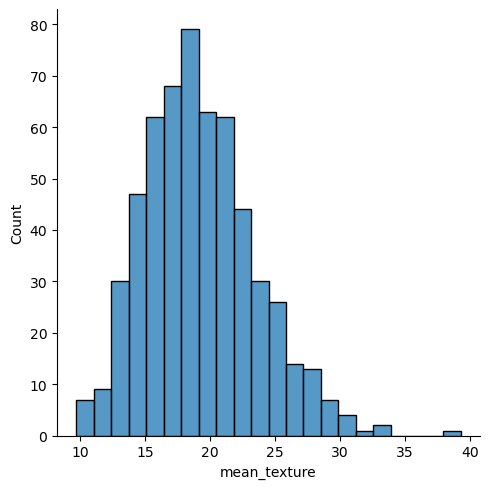

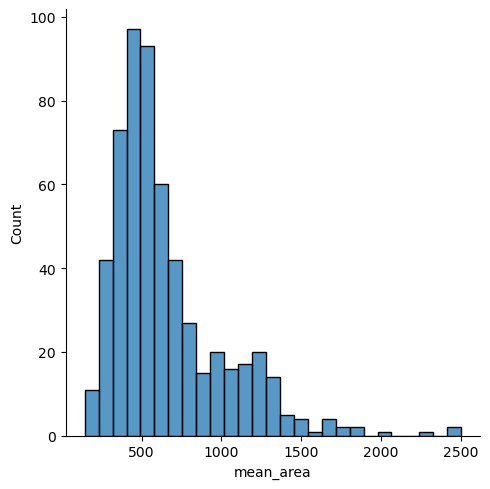

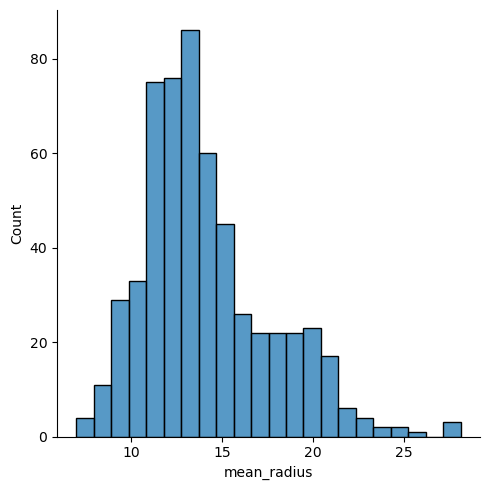

In [266]:
# Age distribution
sns.displot(df["mean_texture"])
sns.displot(df["mean_area"])
sns.displot(df["mean_radius"])


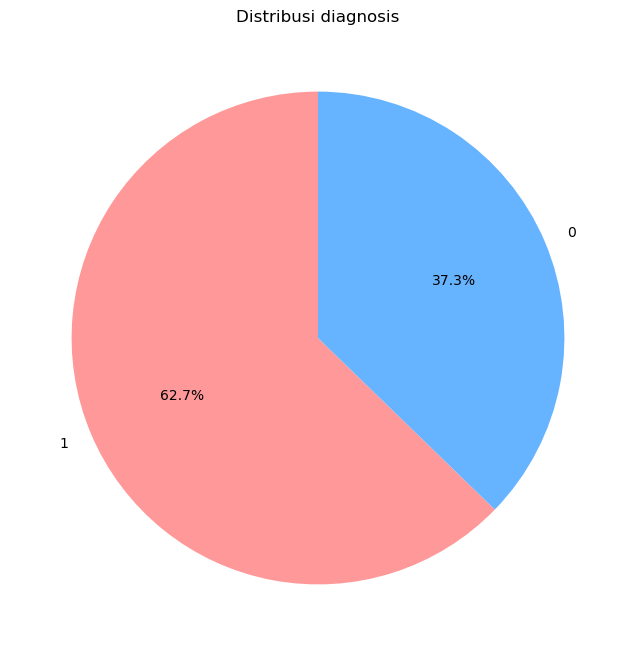

In [267]:
# 3. Pie Chart untuk distribusi Profitability
plt.figure(figsize=(8, 8))
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribusi diagnosis')
plt.ylabel('')
plt.show()

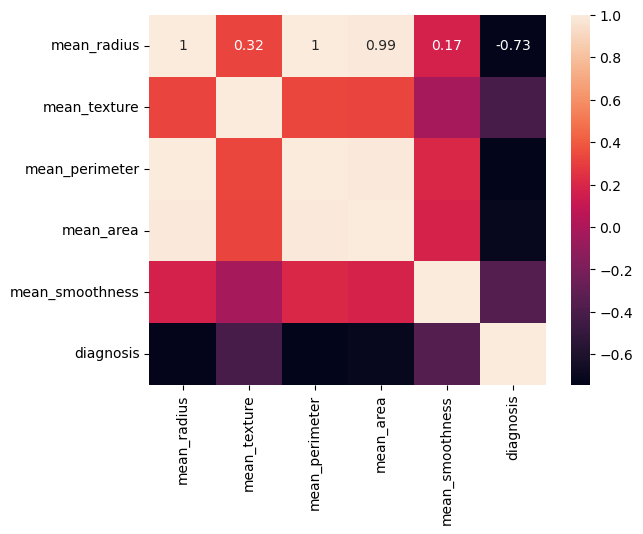

In [268]:
corr = sns.heatmap(df.corr(), annot=True)

In [269]:
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [271]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')
 

Akurasi: 95.61%


In [274]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Contoh data input
input_data = (13.54,14.36,87.46,566.3,0.09779
)

# Mengonversi data input menjadi array numpy
input_data_as_numpy_array = np.array(input_data)

# Mereshape data input untuk prediksi
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

# Contoh model, pastikan model Anda sudah dilatih
# model = DecisionTreeClassifier().fit(X_train, y_train) # Hanya sebagai contoh, ganti dengan model Anda

# Melakukan prediksi
prediction = model.predict(input_data_reshape)
print(prediction)

# Memeriksa hasil prediksi
if prediction[0] == 0:
    print('Tidak Terkena Kanker Payudara')
else:
    print('Terkena Kanker Payudara')

[1]
Terkena Kanker Payudara


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
filename = 'breast_model.sav'
pickle.dump(model,open(filename,'wb'))